In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 43501
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=7>
   FREQ      ERR    LGINT    DR    ELO    GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l  name  Lab 
   MHz       MHz   MHz nm2        1 / cm         u                                                                                                 
 float64   float64 float64 int64 float64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 str2  bool
---------- ------- ------- ----- ------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ---- -----
94135.0017  0.2501 -5.0741     2  1.6049     3    43   501   123     2     2     1    --    --    --     1     2     1    --    --    --   CP False
94264.6685  0.0499 -5.7345     2  1.6005     3    43   501   123     2     2     1    --    --    --     1     2     2    --    --    --   CP False
94308.5207  0.1158 -5.6695     2  1.6049     5    43   501   123     2     2     2    --    --

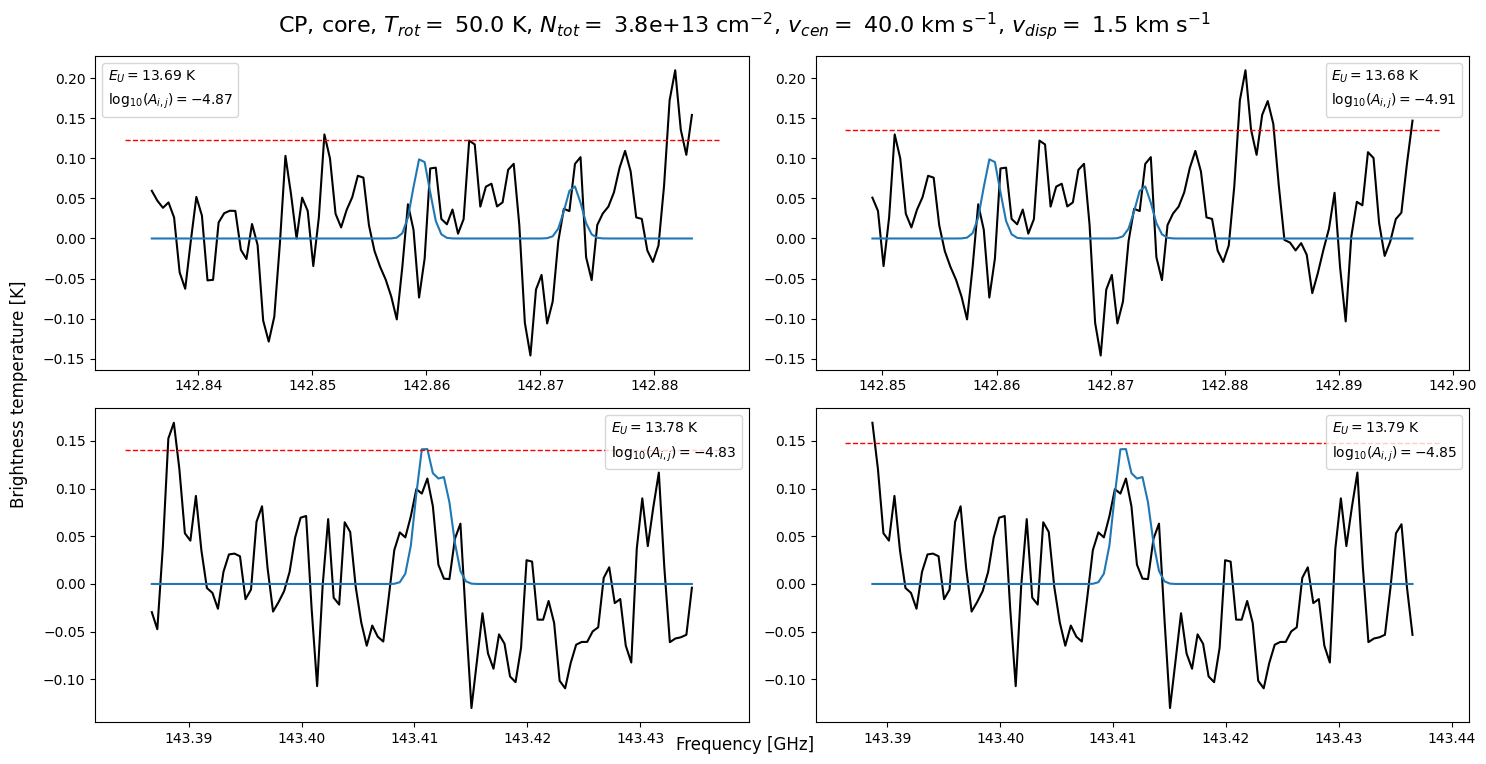

In [29]:
# Generate the model and plot the model and data spectra
freqs_mom0 = model_and_plot(cubes, temp = 50., N_tot = 3.8e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
                            mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=15, fig_height=8, 
                            nrows=2, ncols=2, parse_loc=False, line_by_line=True, name_for_plot=f'CP', extr_type="coord", crd=crd,
                            show_2_sigma=True, EU_cutoff_K=100, return_freqs=True)

In [15]:
# Get subcubes based on mask
cubes_masked, reg = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False, return_mask=True)

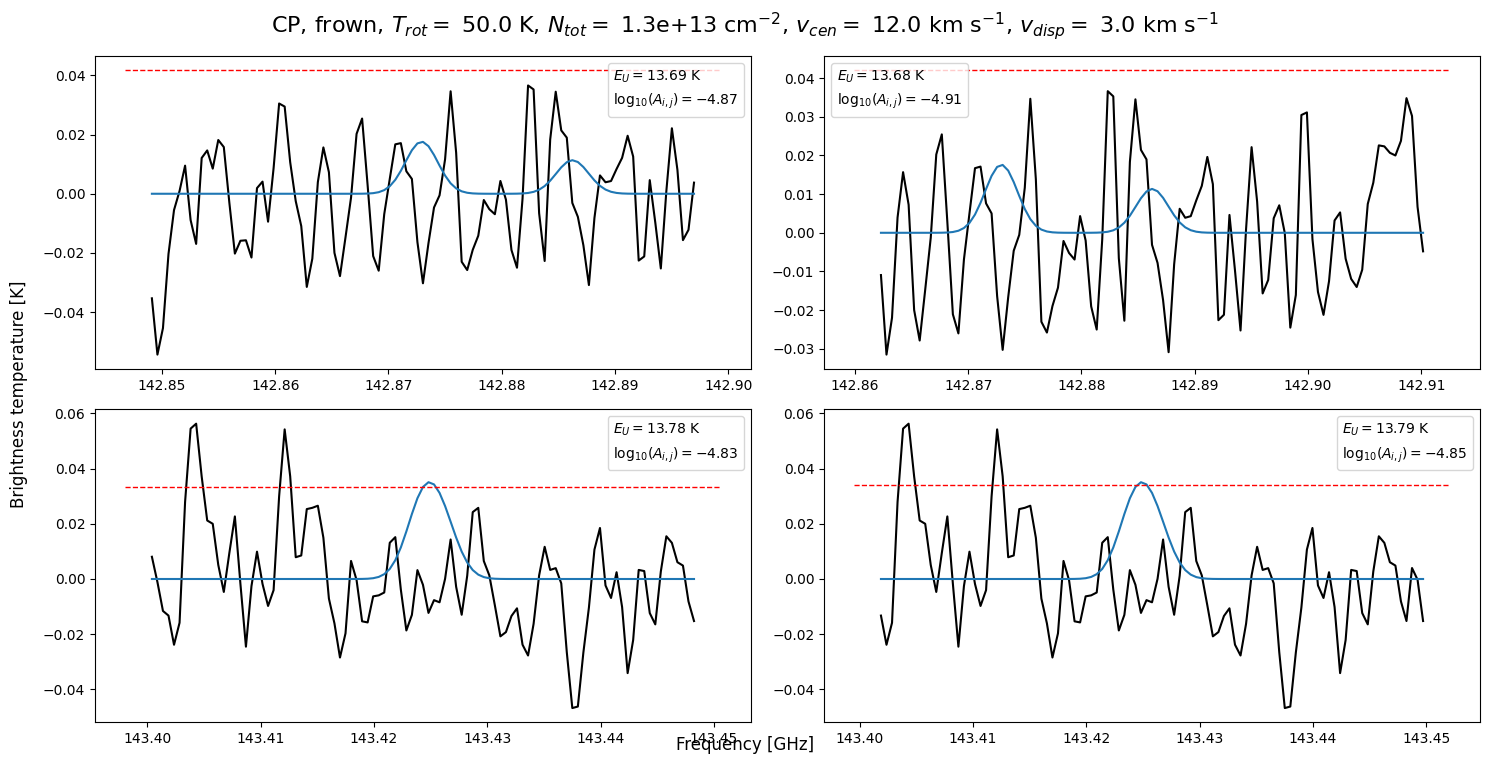

In [33]:
# Generate the model and plot the model and data spectra
EUs, log_N_upper_gs = model_and_plot(cubes_masked, temp = 50., N_tot = 1.3e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                                     mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=15, fig_height=8, 
                                     nrows=2, ncols=2, parse_loc=False, line_by_line=True, name_for_plot=f'CP', extr_type="reg", just_data=False,
                                     show_2_sigma=True, EU_cutoff_K=100, calc_N_uppers=True)

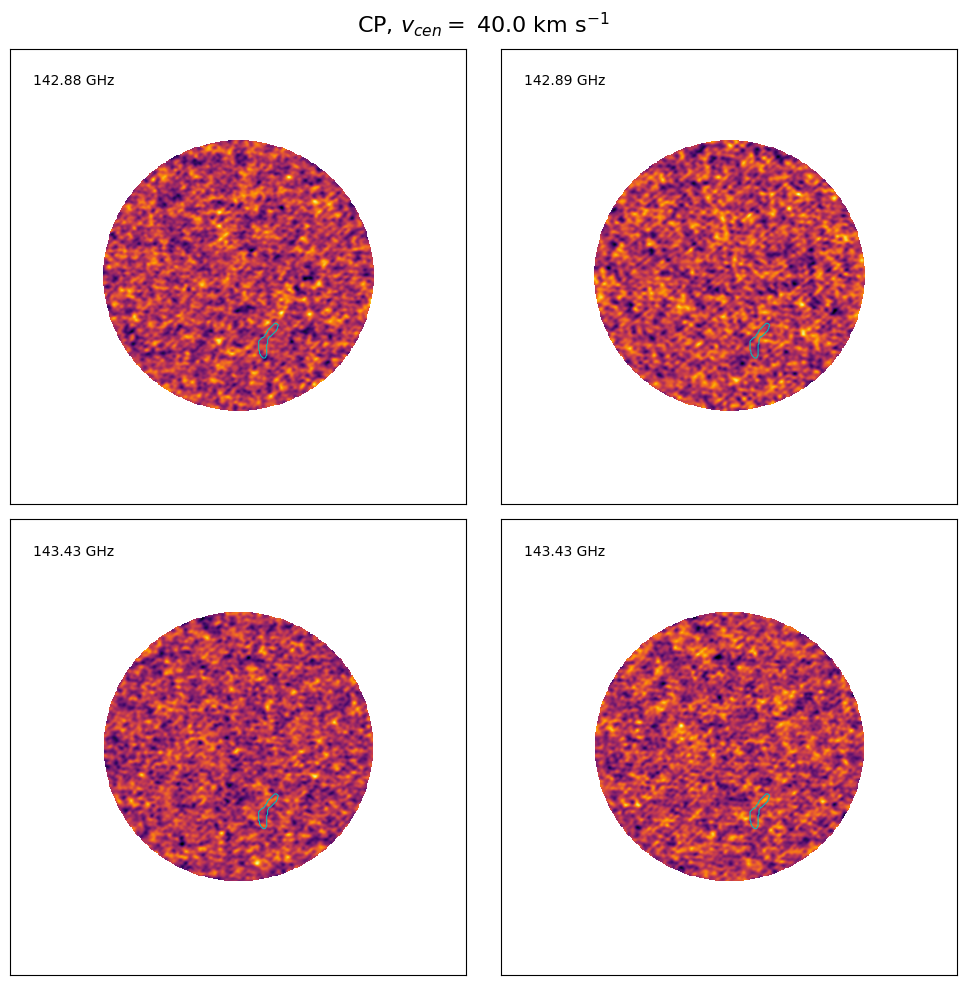

In [20]:
# Plot moment maps
plot_mom0s(cubes, freqs_mom0, v_cen=40*u.km/u.s, fig_width=10, fig_height=10, nrows=2, ncols=2, name_for_plot=f'CP', reg=reg)

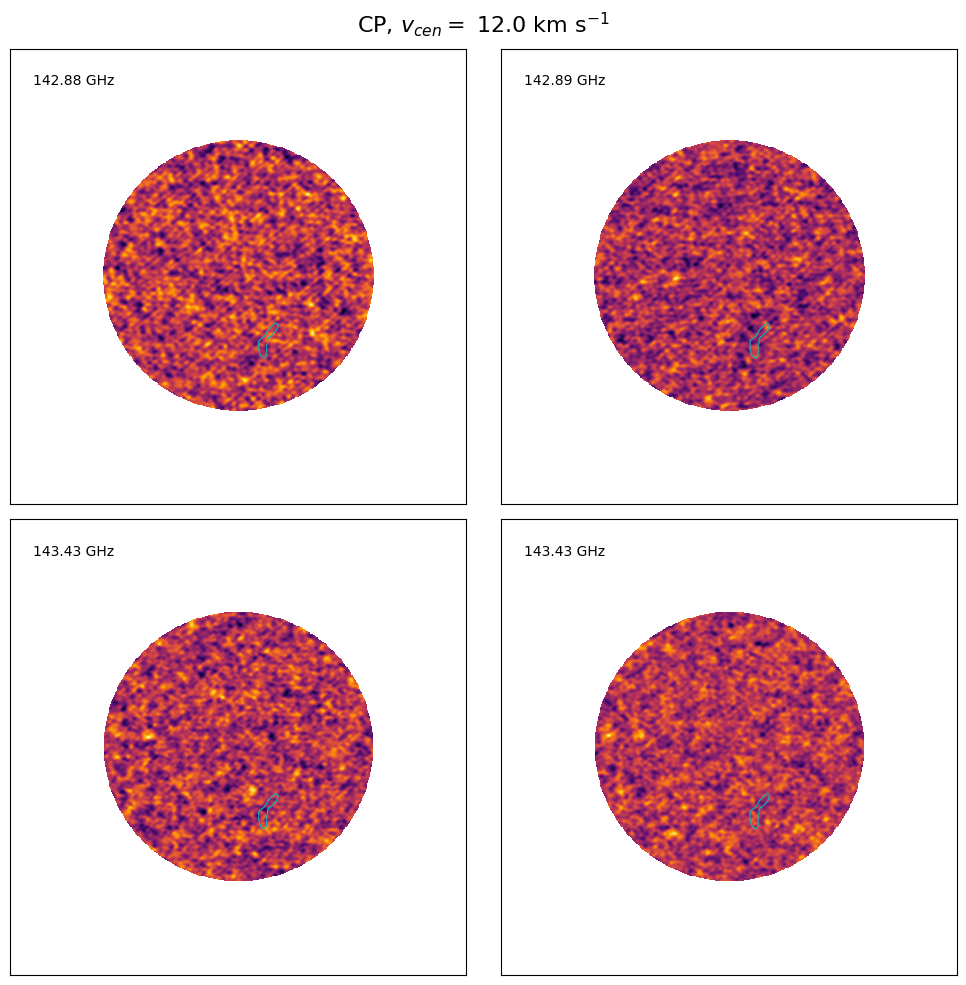

In [21]:
# Plot moment maps
plot_mom0s(cubes, freqs_mom0, v_cen=12*u.km/u.s, fig_width=10, fig_height=10, nrows=2, ncols=2, name_for_plot=f'CP', reg=reg)